# Clustering

The goal of this notebook is to give an answer to the following questions:
1. Does the distribution contain different sub-populations? How many?
2. What's the threshold between the classes?

In [1]:
import numpy as np

In [103]:
import sys
sys.path.append(r'C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Notebooks\AstroStatistics\ML\GammaRayBursts\Utilities')
import utils
import plot_settings

In [104]:
url = 'https://user-web.icecube.wisc.edu/~grbweb_public/Summary_table.txt'
raw, names = utils.read_data(url)

C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Notebooks\AstroStatistics\ML\GammaRayBursts\Utilities\utils.py:21: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  raw = np.loadtxt("Summary_table.txt", dtype='str',unpack='True')


In [105]:
names

array(['GRB_name', 'GRB_name_Fermi', 'T0', 'ra', 'decl', 'pos_error',
       'T90', 'T90_error', 'T90_start', 'fluence', 'fluence_error',
       'redshift', "'T100'", 'GBM_located', 'mjd_(T0)'], dtype='<U14')

In [15]:
ra, de = zip(*[(float(a), float(b)) for a, b in zip(raw[3], raw[4]) 
                                           if a != '-999' and b != '-999' 
                                           and float(b)!=0 and float(a)!=0])

In [16]:
ra = np.array(ra)
de = np.array(de)

In [22]:
import matplotlib.pyplot as plt

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([1.27000000e-01, 3.99498925e+00, 7.86297849e+00, 1.17309677e+01,
        1.55989570e+01, 1.94669462e+01, 2.33349355e+01, 2.72029247e+01,
        3.10709140e+01, 3.49389032e+01, 3.88068925e+01, 4.26748817e+01,
        4.65428710e+01, 5.04108602e+01, 5.42788495e+01, 5.81468387e+01,
        6.20148280e+01, 6.58828172e+01, 6.97508065e+01, 7.36187957e+01,
        7.74867849e+01, 8.13547742e+01, 8.52227634e+01, 8.90907527e+01,
        9.29587419e+01, 9.68267312e+01, 1.00694720e+02, 1.04562710e+02,
        1.08430699e+02, 1.12298688e+02, 1.16166677e+02, 1.20034667e+02,
        1.23902656e+02, 1.27770645e+02, 1.31638634e+02, 1.35506624e+02,
        1.39374613e+02, 1.43242602e+02, 1.47110591e+02, 1.50978581e+02,
        1.54846570e+02, 1.58714

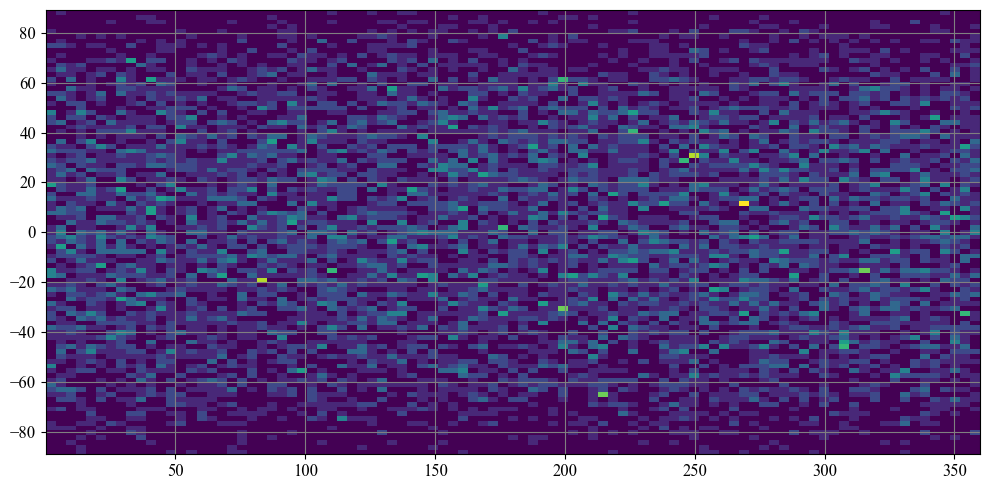

In [26]:
plt.hist2d(ra, de, bins=int(np.sqrt(ra.shape[0])))

## Clustering GMM (No errors)

In [27]:
DD = np.vstack([ra, de]).T

In [28]:
from sklearn import preprocessing

In [29]:
scaler = preprocessing.StandardScaler()

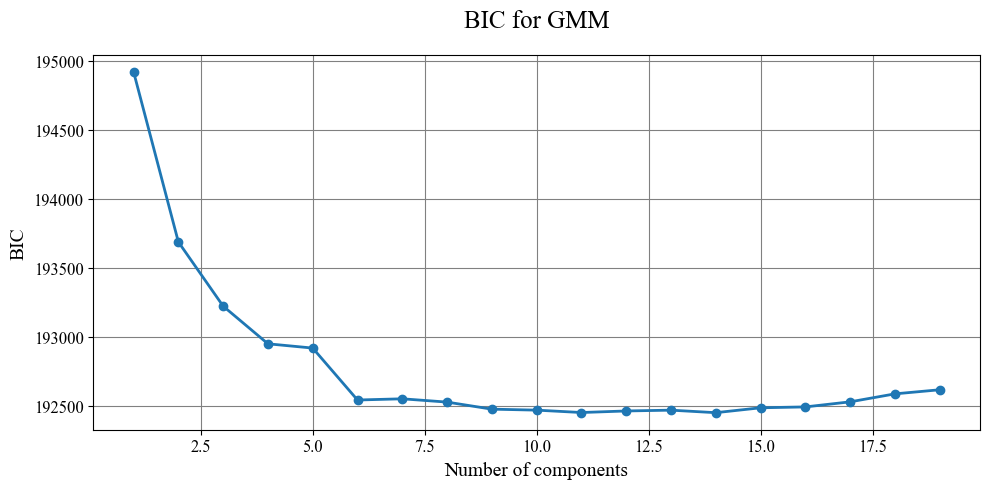

In [31]:
n_clusters, score = utils.Gauss_peaks(DD, 1, 20, True)

In [46]:
n_clusters = 6

In [47]:
labels, model = utils.GM_fit(DD, n_clusters, False)

In [48]:
centroids = model.means_
weights = model.weights_
ll = model.score_samples(DD)

Text(0, 0.5, 'Log Fluence $\\left[\\frac{erg}{cm^2}\\right]$')

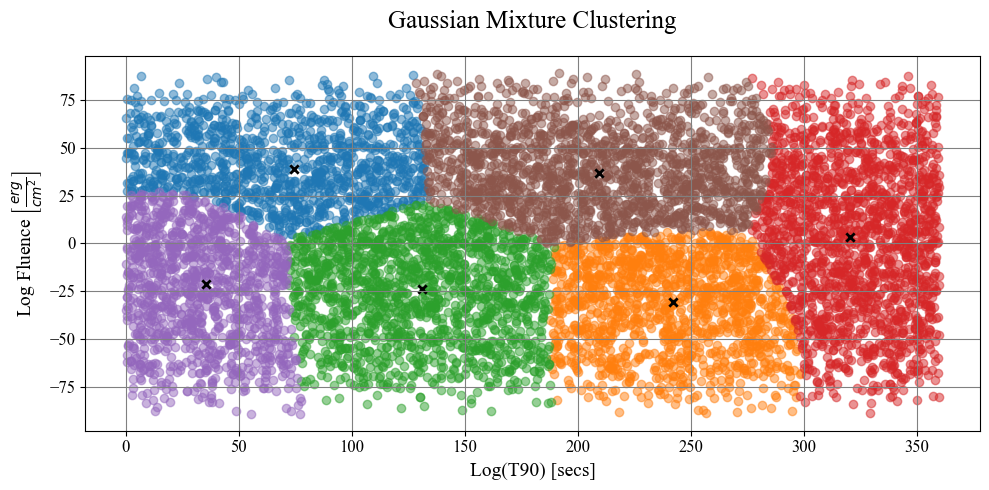

In [49]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

#ax.scatter(np.log10(T90), np.log10(fluence), marker='o', color='gray', label='Raw Data', alpha=0.5)

for i,c in enumerate(centroids):
    ax.scatter(DD.T[0][labels==i],DD.T[1][labels==i], marker='o', alpha=0.5, label=f'Cluster {i}')
    ax.scatter(c[0], c[1], marker='x', color='black')
    

ax.set_title('Gaussian Mixture Clustering')
ax.set_xlabel('Log(T90) [secs]')
ax.set_ylabel(r'Log Fluence $\left[\frac{erg}{cm^2}\right]$')


 ## Cluster KMeans (No errors)

In [50]:
from sklearn.cluster import KMeans

In [51]:
KM = KMeans(n_clusters, random_state=0, n_init='auto').fit(scaler.fit_transform(DD))

In [52]:
print('Score' , KM.score(DD))

Score -387456967.98000306


Text(0, 0.5, 'Log Fluence $\\left[\\frac{erg}{cm^2}\\right]$')

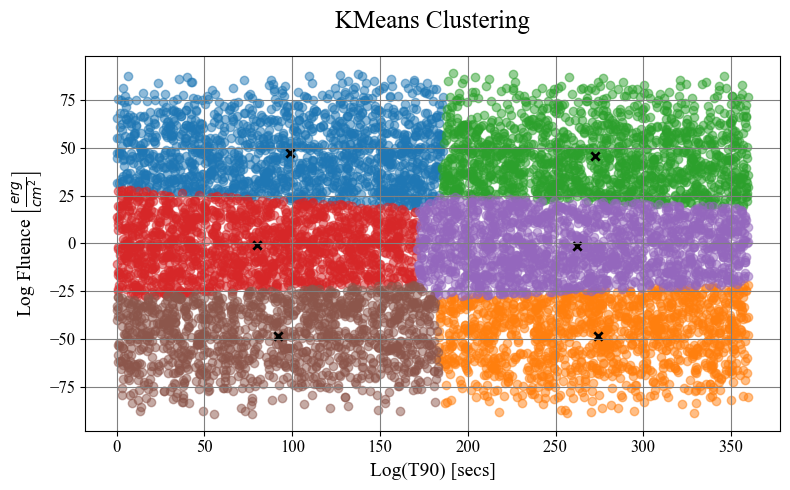

In [53]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()

#ax.scatter(np.log10(T90), np.log10(fluence), marker='o', color='gray', label='Raw Data', alpha=0.5)

for i,c in enumerate(scaler.inverse_transform(KM.cluster_centers_)):
    ax.scatter(DD.T[0][KM.labels_==i],DD.T[1][KM.labels_==i], marker='o', alpha=0.5, label=f'Cluster Train {i}')
    ax.scatter(c[0], c[1], marker='x', color='black')

ax.set_title('KMeans Clustering')
ax.set_xlabel('Log(T90) [secs]')
ax.set_ylabel(r'Log Fluence $\left[\frac{erg}{cm^2}\right]$')

## Mean Shift (No Errors)

In [54]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [55]:
bw = estimate_bandwidth(DD, quantile=0.2)

In [56]:
MS = MeanShift(bandwidth=bw)

In [57]:
MS.fit(DD)

MeanShift(bandwidth=np.float64(68.0230021672804))

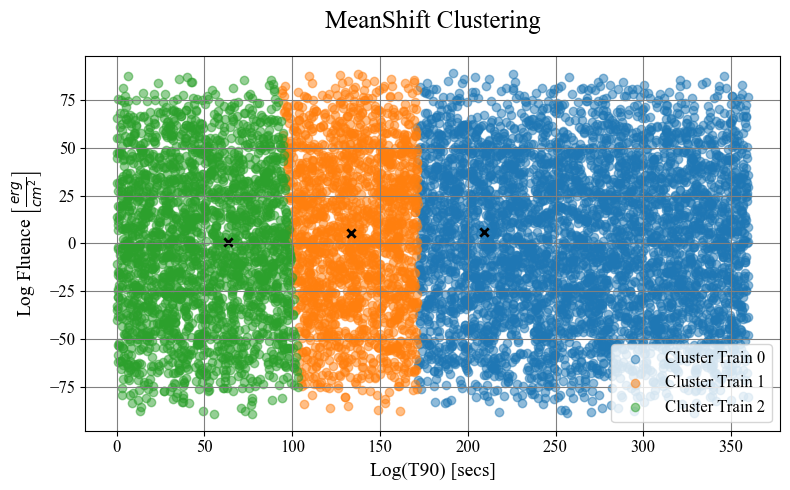

In [58]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()

for i,c in enumerate(MS.cluster_centers_):
    ax.scatter(DD.T[0][MS.labels_==i],DD.T[1][MS.labels_==i], marker='o', alpha=0.5, label=f'Cluster Train {i}')
    ax.scatter(c[0], c[1], marker='x', color='black')

ax.set_title('MeanShift Clustering')
ax.set_xlabel('Log(T90) [secs]')
ax.set_ylabel(r'Log Fluence $\left[\frac{erg}{cm^2}\right]$')
ax.legend()

## DBScan (No Errors)

In [59]:
from sklearn.cluster import DBSCAN

In [60]:
DB = DBSCAN()

In [61]:
DB.fit(DD)

DBSCAN()

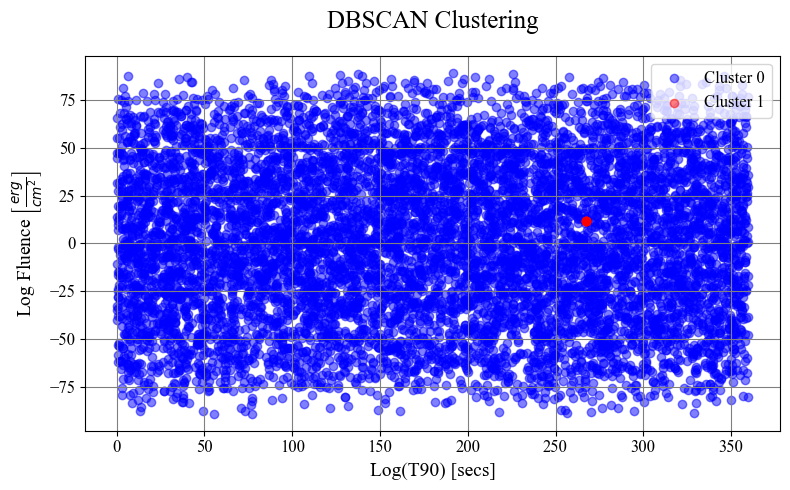

In [62]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()


#for i in range(MS.cluster_centers_.shape[0]):
ax.scatter(DD.T[0][DB.labels_==-1],DD.T[1][DB.labels_==-1], marker='o', alpha=0.5, color='blue', label=f'Cluster {0}')
ax.scatter(DD.T[0][DB.labels_==0],DD.T[1][DB.labels_==0], marker='o', alpha=0.5, color='red',  label=f'Cluster {1}')
ax.set_title('DBSCAN Clustering')
ax.set_xlabel('Log(T90) [secs]')
ax.set_ylabel(r'Log Fluence $\left[\frac{erg}{cm^2}\right]$')
ax.legend()